# 相关包的导入

- networkx 官方文档: https://networkx.github.io/documentation/stable/

In [1]:
import networkx as nx
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

# 生成网络

1. 图:
    - 无向图: Graph
    - 有向图: DiGraph
<br />
<br />
2. 节点:
    - 添加一个节点: add_node(1)
    - 添加多个节点: add_nodes_from([2, 3])
<br />
<br />
3. 边:
    - 添加一条边: add_edge(2, 3)
    - 添加多条边: add_edges_from([(2, 3), (3, 4)])

## 生成无向图

In [2]:
# 创建一个空的无向图G
G = nx.Graph()

# 向G中添加节点
G.add_node(1)

# 添加一条边（隐含地添加了两个节点2和3）
G.add_edge(2, 3)
# 在无向图中边2-3与边3-2被认为相同
G.add_edge(3, 2)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
print("All edges: {}".format(G.edges()))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3]
All edges: [(2, 3)]
Number of edges: 1


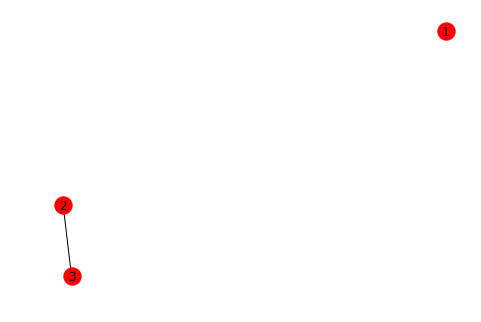

In [3]:
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

## 生成有向图

In [4]:
# 创建一个空的有向图G
G = nx.DiGraph()

# 向G中添加节点
G.add_node(1)

# 添加一条边（隐含地添加了两个节点2和3）
G.add_edge(2, 3)
# 在有向图中边2-3与边3-2被认为不相同
G.add_edge(3, 2)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
# 观察与无向图中结果的不同之处
print("All edges: {}".format(G.edges()))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3]
All edges: [(2, 3), (3, 2)]
Number of edges: 2


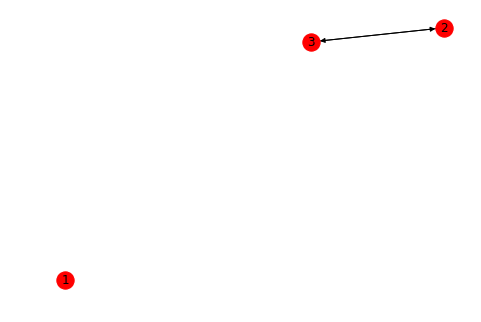

In [5]:
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

## 生成加权图

In [6]:
# 创建一个空的无向图G (或有向图)
G = nx.Graph()

# 向G中添加节点
G.add_node(1)

# 添加一条带有权重的边
G.add_edge(2, 3, weight=3)
G.add_edge(2, 1, weight=5)
G.add_edge(3, 5, weight=1)
G.add_edge(1, 4, weight=3)
G.add_edge(2, 5, weight=6)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
print("All edges: {}".format(G.edges()))
print("All edges data: {}".format(G.edges(data=True)))

# 查看边的权重
print("Data of edge 2-3: {}".format(G.get_edge_data(2, 3)))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3, 5, 4]
All edges: [(1, 2), (1, 4), (2, 3), (2, 5), (3, 5)]
All edges data: [(1, 2, {'weight': 5}), (1, 4, {'weight': 3}), (2, 3, {'weight': 3}), (2, 5, {'weight': 6}), (3, 5, {'weight': 1})]
Data of edge 2-3: {'weight': 3}
Number of edges: 5


{(1, 2): Text(-0.110423,0.0158513,'5'),
 (1, 4): Text(-0.699515,0.0335639,'3'),
 (2, 3): Text(0.423602,-0.154615,'3'),
 (2, 5): Text(0.365004,0.124464,'6'),
 (3, 5): Text(0.610423,-0.0369763,'1')}

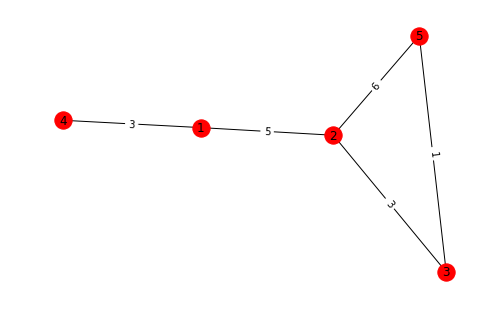

In [7]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

In [8]:
nx.adj_matrix(G).todense()

matrix([[0, 5, 0, 0, 3],
        [5, 0, 3, 6, 0],
        [0, 3, 0, 1, 0],
        [0, 6, 1, 0, 0],
        [3, 0, 0, 0, 0]], dtype=int32)

In [9]:
np.array([[0, 5, 0, 0, 3],
          [5, 0, 3, 6, 0],
          [0, 3, 0, 1, 0],
          [0, 6, 1, 0, 0],
          [3, 0, 0, 0, 0]])

array([[0, 5, 0, 0, 3],
       [5, 0, 3, 6, 0],
       [0, 3, 0, 1, 0],
       [0, 6, 1, 0, 0],
       [3, 0, 0, 0, 0]])

## 根据邻接矩阵生成网络

All nodes: [0, 1, 2, 3, 4]
All edges: [(0, 1), (0, 2), (0, 4), (1, 3), (2, 3), (3, 4)]
Number of edges: 6


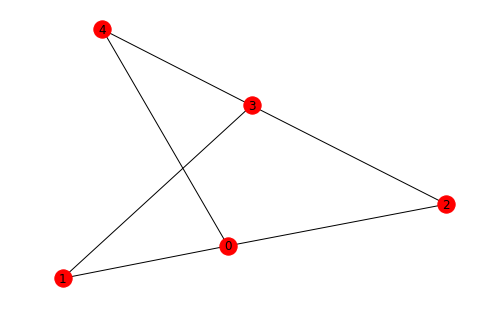

In [10]:
adj_matrix = np.array([[0, 1, 1, 0, 1],
                       [1, 0, 0, 1, 0],
                       [1, 0, 0, 1, 0],
                       [0, 1, 1, 0, 1],
                       [1, 0, 0, 1, 0]])


G = nx.Graph(adj_matrix)

print("All nodes: {}".format(G.nodes()))
print("All edges: {}".format(G.edges()))
print("Number of edges: {}".format(G.number_of_edges()))

nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

In [11]:
new_list = list(range(1, len(list(G.nodes())) + 1))

In [12]:
new_list

[1, 2, 3, 4, 5]

In [13]:
mapping = dict(zip((G.nodes()), new_list))

In [14]:
mapping

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

In [15]:
# mapping: 旧的索引与新的索引的映射字典

G_new = nx.relabel_nodes(G, mapping=mapping)

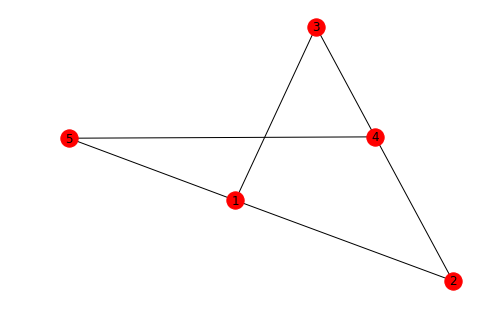

In [16]:
nx.draw(G_new, pos=nx.spring_layout(G_new), with_labels=True)

## 根据边列表生成网络

In [17]:
edge_list = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 3), (3, 4)]
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from(edge_list)
print("All nodes: {}".format(G.nodes()))
print("All edges: {}".format(G.edges()))
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [0, 1, 2, 3, 4]
All edges: [(0, 1), (0, 2), (0, 4), (1, 3), (2, 3), (3, 4)]
Number of edges: 6


# 获取网络的邻接矩阵

In [18]:
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [19]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 4), (1, 3), (2, 3), (3, 4)])

- nx.adj_matrix(G): 以稀疏矩阵的形式返回网络对应的邻接矩阵

In [20]:
nx.adj_matrix(G)

<5x5 sparse matrix of type '<class 'numpy.intc'>'
	with 12 stored elements in Compressed Sparse Row format>

In [21]:
print(nx.adj_matrix(G))

  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (1, 0)	1
  (1, 3)	1
  (2, 0)	1
  (2, 3)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (4, 0)	1
  (4, 3)	1


In [22]:
# 转化为稠密矩阵
print(nx.adj_matrix(G).todense())

[[0 1 1 0 1]
 [1 0 0 1 0]
 [1 0 0 1 0]
 [0 1 1 0 1]
 [1 0 0 1 0]]


# 获取节点的邻居

- nx.neighbors(G, 0)
- G.neighbors(0)

In [23]:
# 返回的是一个迭代器
nx.neighbors(G, 0)

In [24]:
G.neighbors(0)

In [25]:
list(G.neighbors(0))

[1, 2, 4]

In [26]:
for neighbor in G.neighbors(0):
    print(neighbor)

1
2
4


# 迪杰斯特拉算法求解加权图最短路径问题

- nx.dijkstra_path(G, source, target)        ——最短路径
- nx.dijkstra_path_length(G, source, target)   ——最短距离

生成一个空的有向图
为这个网络添加节点...
在网络中添加带权中的边...
给网络设置布局...
画出网络图像：


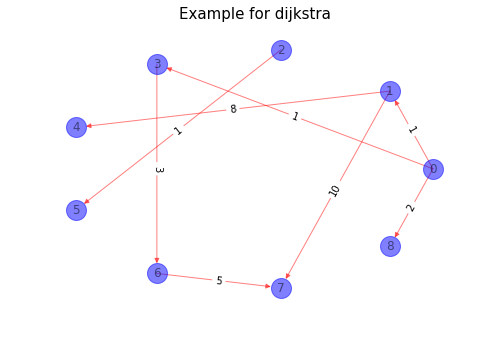

In [27]:
#自定义网络
row = np.array([0,0,0,1,2,3,6,1])
col = np.array([1,8,3,4,5,6,7,7])
value = np.array([1,2,1,8,1,3,5,10])

print('生成一个空的有向图')
G = nx.DiGraph()
print('为这个网络添加节点...')
for i in range(0, np.size(col)+1):
    G.add_node(i)
print('在网络中添加带权中的边...')
for i in range(np.size(row)):
    G.add_weighted_edges_from([(row[i], col[i], value[i])])

print('给网络设置布局...')
pos = nx.shell_layout(G)
print('画出网络图像：')
nx.draw(G,pos,with_labels=True, node_color='blue', edge_color='red', node_size=400, alpha=0.5 )

edge_labels = {}
for edge in G.edges():
    edge_labels[edge] = G.get_edge_data(edge[0], edge[1])['weight']
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
pylab.title('Example for dijkstra',fontsize=15)
pylab.show()

In [28]:
print("-----------节点0到节点7的所有路径-------------")
print("0-7的所有路径：")
for path in nx.all_simple_paths(G, source=0, target=7):
    distance = 0
    for i in range(len(path)-1):
        distance += G.get_edge_data(path[i], path[i+1])['weight']
    print("路径: {}, 长度: {}".format(path, distance))

print()

'''
Shortest Path with dijkstra_path
'''
print("-----------dijkstra方法寻找0-7的最短路径-------------")
path = nx.dijkstra_path(G, source=0, target=7)
print('节点0到7的最短路径：', path)
print("-----------dijkstra方法寻找0-7的最短距离-------------")
distance = nx.dijkstra_path_length(G, source=0, target=7)
print('节点0到7的最短距离为：', distance)

-----------节点0到节点7的所有路径-------------
0-7的所有路径：
路径: [0, 1, 7], 长度: 11
路径: [0, 3, 6, 7], 长度: 9

-----------dijkstra方法寻找0-7的最短路径-------------
节点0到7的最短路径： [0, 3, 6, 7]
-----------dijkstra方法寻找0-7的最短距离-------------
节点0到7的最短距离为： 9


# 作业

<b>一、实验内容：</b>
给定网络图，利用Python存储和输出相应的网络图  

<b>二、实验要求：</b>
1. 利用add node与add edge方法逐一添加节点和边生成图
2. 写出如下图的邻接矩阵，并以邻接矩阵作为输入生成图
3. 输出图中的边列表，并以边列表作为输入生成图  

![jupyter](./work1.png)